In [1]:
import numpy as np

import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt

In [3]:
# 雅虎财经可以下载任何已上市公司的数据
df = pd.read_csv('./AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.377609,18362400.0


In [4]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9814 entries, 0 to 9813
Data columns (total 7 columns):
Date         9814 non-null object
Open         9813 non-null float64
High         9813 non-null float64
Low          9813 non-null float64
Close        9813 non-null float64
Adj Close    9813 non-null float64
Volume       9813 non-null float64
dtypes: float64(6), object(1)
memory usage: 536.8+ KB


In [7]:
type(df['Date'][0])

str

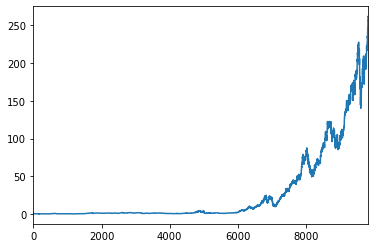

In [8]:
df['Adj Close'].plot()

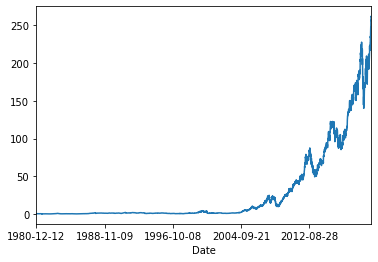

In [11]:
df2 = df.set_index('Date')
df2['Adj Close'].plot(kind = 'line')

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
display(df.head(),df.dtypes)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.377609,18362400.0


Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

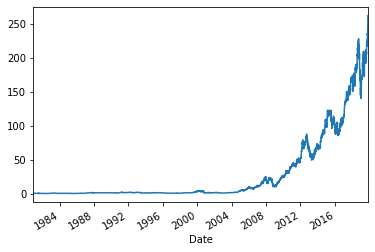

In [15]:
df3 = df.set_index('Date')
df3['Adj Close'].plot()

In [22]:
# resample 重采样，行索引是时间序列，按照天排列
# groupby 分组聚合
# 透视表类似的
df3.resample('W')['Adj Close'].mean()

Date
1980-12-14      0.407747
1980-12-21      0.377964
1980-12-28      0.455613
1981-01-04      0.495501
1981-01-11      0.451004
                 ...    
2019-10-20    234.745233
2019-10-27    242.035345
2019-11-03    247.293552
2019-11-10    257.825916
2019-11-17    262.080001
Freq: W-SUN, Name: Adj Close, Length: 2032, dtype: float64

In [25]:
df3.resample('W')['Adj Close'].agg(['mean','max','min'])

,mean,max,min
Date,,,
1980-12-14,0.407747,0.407747,0.407747
1980-12-21,0.377964,0.400656,0.358108
1980-12-28,0.455613,0.503479,0.420157
1981-01-04,0.495501,0.510570,0.483978
1981-01-11,0.451004,0.478659,0.429021
...,...,...,...
2019-10-20,234.745233,235.702362,233.668457
2019-10-27,242.035345,245.841919,239.241745
2019-11-03,247.293552,255.054260,242.531845
